# Cross-validation for parameter tuning, model selection, and feature selection

REFERENCE: https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [117]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


Question: What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

Answer: That's the essense of cross-validation!

KFold reference: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html


In [118]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = False)
kf.get_n_splits(X)



5

In [119]:
# Thanks 
# https://stackoverflow.com/questions/46633273/sklearn-kfold-returning-wrong-indexes-in-python?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
# https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

dfdata = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

print(dfdata.shape)
print(kf.get_n_splits(dfdata))

kf = KFold(n_splits = 10, shuffle = True )
interaction = 0
for train_index, test_index in kf.split(dfdata):
    train_data = dfdata.iloc[train_index]
    test_data = dfdata.iloc[test_index]
    interaction += 1
    print("Interaction (fold)", interaction,"\n",
          "Training data index: \n",train_index,"\n",
          "Test data index: \n", test_index,"\n")    


(150, 5)
5
Interaction (fold) 1 
 Training data index: 
 [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  56  57
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  85  86  87  88  90  91  93  94  95  96  97
  98  99 100 101 102 104 105 107 108 109 110 111 112 113 114 115 116 117
 118 120 121 122 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 141 143 144 145 146 148 149] 
 Test data index: 
 [  5  19  23  55  58  84  89  92 103 106 119 123 140 142 147] 

Interaction (fold) 2 
 Training data index: 
 [  0   1   2   3   4   5   6   7   9  10  11  12  13  15  16  17  18  19
  20  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39
  40  42  43  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70

## Comparing cross-validation to train/test split
### Advantages of cross-validation:

* More accurate estimate of out-of-sample accuracy
* More "efficient" use of data (every observation is used for both training and testing)

### Advantages of train/test split:

* Runs K times faster than K-fold cross-validation
* Simpler to examine the detailed results of the testing process

##  Cross-validation recommendations
- K can be any number, but K=10 is generally recommended
- For classification problems, stratified sampling is recommended for creating the folds
- Each response class should be represented with equal proportions in each of the K folds
- scikit-learn's cross_val_score function does this by default


# Selecting parameters

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [120]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print("Mean score:", scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Mean score: 0.9666666666666668


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


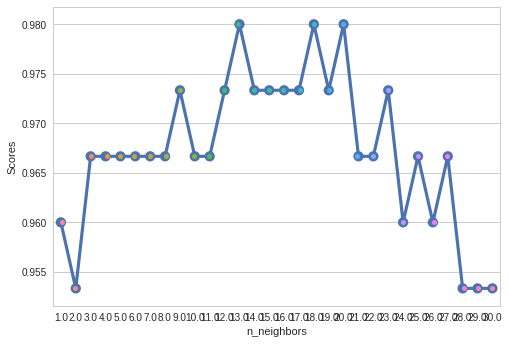

In [121]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
cross_valid_folds = 10
k_scores = []
k_std = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cross_valid_folds, scoring='accuracy')
    k_scores.append(scores.mean())
    k_std.append(scores.std())
    
dataCV = pd.DataFrame([k_range, k_scores, k_std]).T
dataCV.columns = ["n_neighbors", "Scores", "Starndard_deviation"]
dataCV


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.pointplot(x="n_neighbors", y="Scores", data=dataCV, jitter=True);
sns.stripplot(x="n_neighbors", y="Scores", data=dataCV, jitter=True);


[1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8666666666666667, 1.0, 1.0, 1.0]
[1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8666666666666667, 0.9333333333333333, 1.0, 1.0]
[1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0]
[1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0]
[1.0, 0.9333333333333333, 1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 1.0]
[1.0, 0.9333333333333333, 1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 1.0]
[1.0, 0.9333333333333333, 1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 1.0]
[1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0]
[1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 0.93333333333333

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


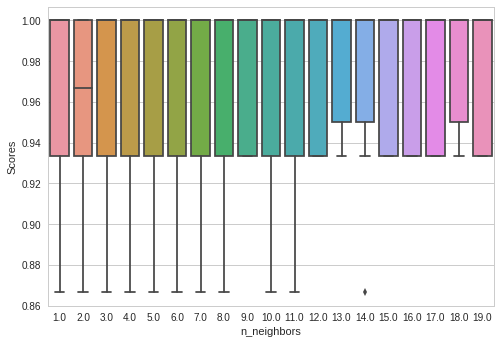

In [122]:
# search for an optimal value of K for KNN
k_range = list(range(1, 20))
cross_valid_folds = 10
k_scores = []
k_parms = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cross_valid_folds, scoring='accuracy')
    print(list(scores))
    parms = [k] * cross_valid_folds
    k_scores = k_scores + list(scores)
    k_parms = k_parms + parms
    
dataCV = pd.DataFrame([k_parms, k_scores]).T
dataCV.columns = ["n_neighbors", "Scores"]
# display(dataCV)


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.boxplot(x="n_neighbors", y="Scores", data=dataCV);

# sns.pointplot(x="n_neighbors", y="Scores", data=dataCV, jitter=True);
# sns.stripplot(x="n_neighbors", y="Scores", data=dataCV, jitter=True);


[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

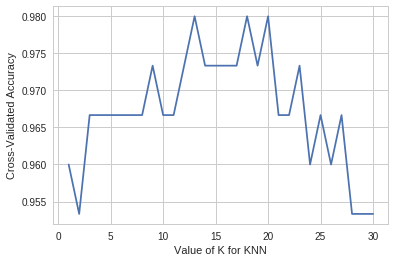

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

http://nbviewer.jupyter.org/github/cs109/content/blob/master/lec_10_cross_val.ipynb
